In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

In [3]:
path=os.listdir(r'D:\Aje\Data Science\dataset\banana leaf\train')
classes={'healthy':0,'segatoka':1}

In [4]:
import cv2

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    th = r'D:\\Aje\\Data Science\\dataset\\banana leaf\\train\\'+cls
    for j in os.listdir(th):
        img = cv2.imread(th+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
np.unique

<function numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None, *, equal_nan=True)>

In [36]:
X = np.array (X)
Y = np.array(Y)

In [37]:
pd.Series(Y).value_counts()

1    320
0    155
dtype: int64

In [38]:
X.shape

(475, 200, 200)

In [39]:
X_updated=X.reshape(len(X), -1)
X_updated.shape

(475, 40000)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X_updated,Y,random_state=10,test_size=0.20)

In [41]:
X_train.shape, X_test.shape

((380, 40000), (95, 40000))

In [42]:
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())
X_train=X_train/255
X_test=X_test/255
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [43]:
from sklearn.decomposition import PCA

In [44]:
pca=PCA(0.98)
pca_train=X_train
pca_test=X_test

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [46]:
import warnings
warnings.filterwarnings('ignore') 

lg=LogisticRegression(C=0.1)
lg.fit(pca_train,y_train)

LogisticRegression(C=0.1)

In [47]:
sv=SVC()
sv.fit(pca_train,y_train)

SVC()

In [48]:
print("training Score:",lg.score(pca_train,y_train))
print("testing Score:",lg.score(pca_test,y_test))

training Score: 1.0
testing Score: 0.6631578947368421


In [49]:
print("training Score:",sv.score(pca_train,y_train))
print("testing Score:",sv.score(pca_test,y_test))

training Score: 0.9605263157894737
testing Score: 0.8315789473684211


In [50]:
pred=sv.predict(pca_test)
np.where(y_test!=pred)

(array([15, 34, 35, 40, 45, 47, 52, 67, 70, 72, 75, 76, 77, 85, 87, 91],
       dtype=int64),)

In [51]:
pred[6]

1

In [52]:
y_test[7]

1

In [53]:
dec={0:'healthy',1:'segatoka'}

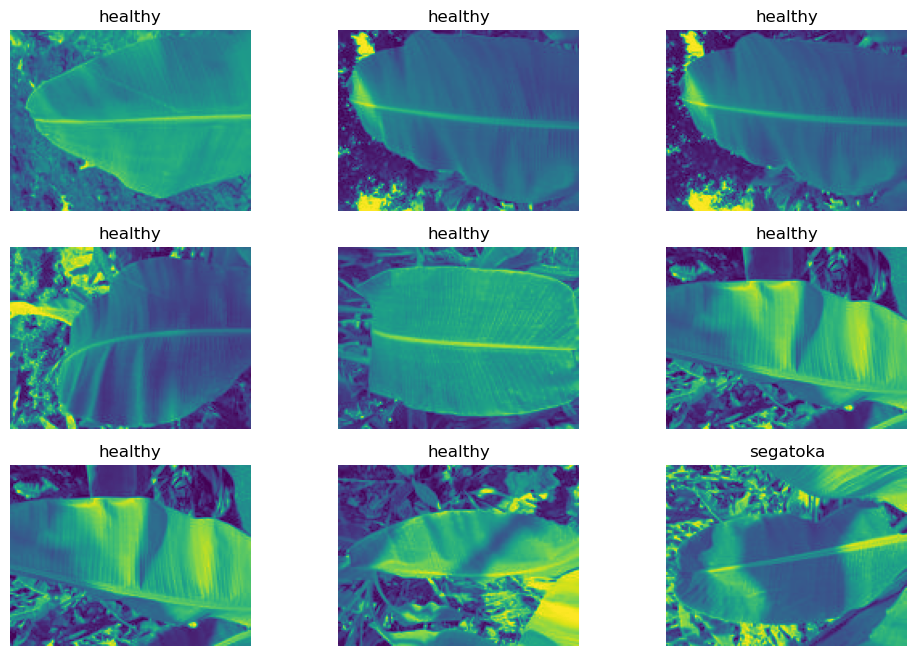

In [55]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\Aje\Data Science\dataset\banana leaf\test')
c=1
for i in os.listdir(r'D:\Aje\Data Science\dataset\banana leaf\test\healthy')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'D:\\Aje\\Data Science\\dataset\\banana leaf\\test\\healthy\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

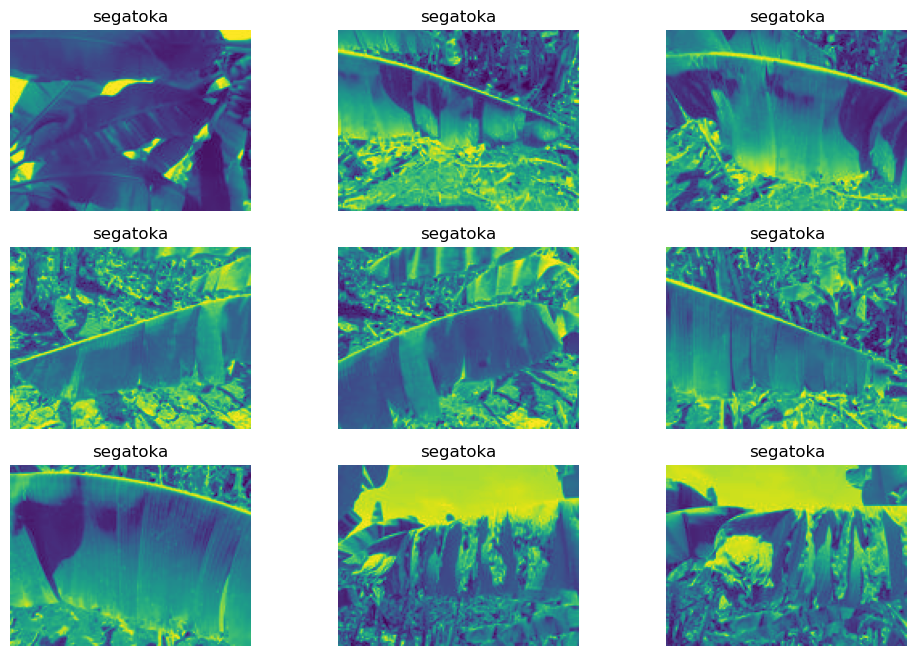

In [64]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\Aje\Data Science\dataset\banana leaf\test')
c=1
for i in os.listdir(r'D:\Aje\Data Science\dataset\banana leaf\test\segatoka')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'D:\\Aje\\Data Science\\dataset\\banana leaf\\test\\segatoka\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

In [65]:
y_pred =sv.predict(X_test)

In [66]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.8315789473684211
